-----

## Importe de Librerias 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Datos

In [2]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')
trips = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_rec = pd.read_csv('/datasets/project_sql_result_07.csv')

## Preparacion de Datos

In [3]:
#Informacion General de los DataFrames que estamos trabajando
company.info()
print()
trips.info()
# Cambio de tipo de objeto de str a date
weather_rec['start_ts'] = pd.to_datetime(weather_rec['start_ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
print(company.duplicated().sum())
print(trips.duplicated().sum())

0
0


* Gracias al info podemos ver que no se encuentra ningun valor nulo presente en ninguna de las 2 tablas.
* Tampoco se encuentra ningun valor duplicado visible.
* Todas las columnas de ambos DataFrames presentan correctamente sus tipos de objeto.

## Analisis de Datos

In [5]:
#10 Barrios principales en finalizacion de recorridos
print(trips.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


* Si nos fijamos la tabla trips contiene los datos de el promedio de viajes finalizados ya en orden descendente por lo que solo seria seleccionar la primeras 10 filas esperando encontrar a los principales barrios con estas caracteristicas.
* Siendo los 2 principales "Loop" y "River North".

## Representaciones Grafica 

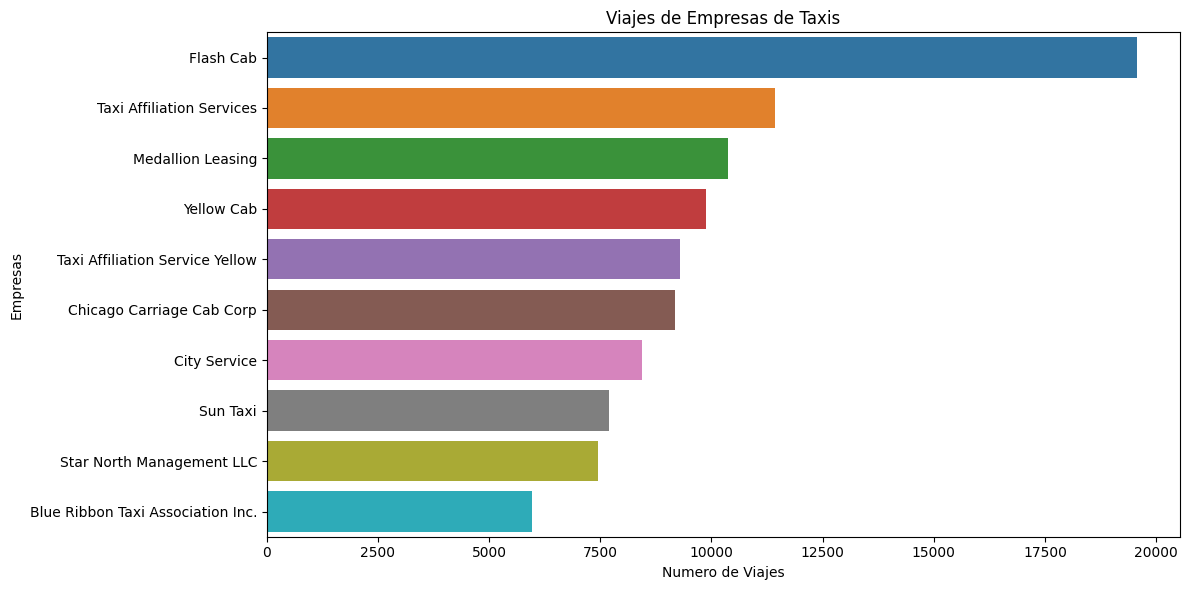

In [6]:
# Empresa de taxis y numero de viajes
plt.figure(figsize=(12, 6))
sns.barplot(data= company.head(10), x= 'trips_amount', y='company_name')
plt.title("Viajes de Empresas de Taxis")
plt.xlabel("Numero de Viajes")
plt.ylabel("Empresas")
plt.tight_layout()
plt.show()

* Por la grafica podemos notar que la empresa "Flash Cab" es la que posee mayor numero de vajes ralizados en las fechas 15 y 16 de noviembre del 2017.

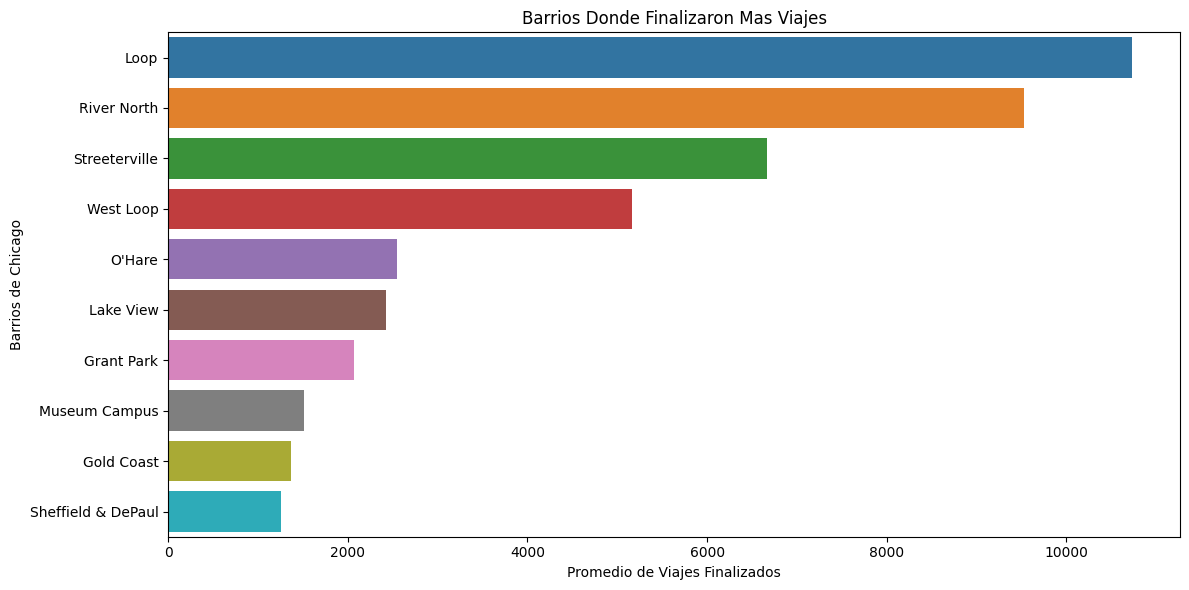

In [7]:
# Los 10 barrios principales por # de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(data= trips.head(10), x= 'average_trips', y='dropoff_location_name')
plt.title("Barrios Donde Finalizaron Mas Viajes")
plt.xlabel("Promedio de Viajes Finalizados")
plt.ylabel("Barrios de Chicago")
plt.tight_layout()
plt.show()

* Por la anterior grafica podemos notar los 10 barrios en los que se promedian mas finalizaciones de viajes poniendo el barrio "Loop" como uno de los mas resaltados a estas caracteristicas junto con "River North".

## Prueba de hipotesis estadistica 

In [8]:
#Creacion de la poblacion de datos seleccionados un sabado con lluvia
df_rain = weather_rec[(weather_rec['start_ts'].dt.dayofweek == 5) & (weather_rec['weather_conditions'] == 'Bad')]

#Verificacion de la varianza para ambas poblaciones de datos (todos los dias vs sabados)
stats, p = levene(weather_rec['duration_seconds'], df_rain['duration_seconds'])
print(p > 0.05) #equal_var será "True"

True


In [9]:
# La duración promedio desde "Loop" hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos
alpha = 0.05
results = st.ttest_ind(weather_rec['duration_seconds'], df_rain['duration_seconds'])
print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 9.19867542516908e-09
Rechazamos la hipótesis nula


* Nuestra hipotesis nula fue rechazada al no tener cambios segun las condiciones climaticas en un dia especifico como sabado.

* Hipotesis nula: la duracion de los viajes cambia segun condiciones climaticas.
* Hipotesis alternativa: las condiciones externas no interfieren en la duracion de los viajes.

* Utilice ttest_ind para comparar 2 poblaciones de datos que presentan caracteristicas diferentes pero comparten la misma informacion. 

## Conclusion 

Tras analizar los datos de viajes, identificamos los 10 barrios principales en términos de finalización de recorridos. Los barrios con mayor promedio de viajes finalizados fueron Loop (10,727 viajes promedio) y River North (9,524 viajes promedio), seguidos de Streeterville (6,665), West Loop (5,164) y O’Hare (2,547). El resto de los barrios principales incluyen Lake View (2,421), Grant Park (2,069), Museum Campus (1,510), Gold Coast (1,364) y Sheffield & DePaul. En general, la suma de los promedios de estos 10 barrios representa una parte significativa del total de viajes finalizados, mostrando que la actividad se concentra en zonas muy específicas. Por otra parte, la empresa Flash Cab registró la mayor cantidad de viajes durante los días 15 y 16 de noviembre de 2017, superando ampliamente a las demás compañías en la misma fecha.

Se realizó una prueba de hipótesis para evaluar si las condiciones climáticas afectan la duración de los viajes los sábados. La hipótesis nula planteaba que la duración de los viajes cambia según las condiciones climáticas, mientras que la alternativa indicaba que estas condiciones externas no interfieren significativamente. Usando ttest_ind para comparar dos poblaciones de datos con características distintas pero comparables, se obtuvo un valor-p de 9.1987e-09, lo que llevó a rechazar la hipótesis nula. Esto indica que, en los sábados analizados, la duración promedio de los viajes no se ve afectada por las condiciones climáticas, permitiendo identificar patrones de demanda más consistentes en los barrios con mayor actividad.